In [1]:
import datetime as dt

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 


In [2]:
# importing libraries such as panadas for Dataframe and numpy for manupulating arrays
import pandas as pd
import numpy as np

# Reading CSV file  

In [3]:
wildlife = pd.read_csv("MODIS_C6_1_South_Asia_7d.csv")

In [4]:
wildlife.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,confidence,version,bright_t31,frp,daynight
0,7.37478,81.37296,318.39,1.01,1.01,2022-05-11,501,T,70,6.1NRT,292.44,11.15,D
1,28.47017,80.96015,324.15,1.46,1.19,2022-05-11,455,T,19,6.1NRT,299.90,12.90,D
2,27.89231,81.54675,326.51,1.33,1.14,2022-05-11,455,T,72,6.1NRT,300.69,10.63,D
3,26.63741,82.95482,331.01,1.10,1.05,2022-05-11,457,T,72,6.1NRT,305.98,11.30,D
4,26.64724,80.03714,325.69,1.58,1.24,2022-05-11,457,T,58,6.1NRT,302.43,14.25,D


In [5]:
wildlife.isnull().sum()

latitude      0
longitude     0
brightness    0
scan          0
track         0
acq_date      0
acq_time      0
satellite     0
confidence    0
version       0
bright_t31    0
frp           0
daynight      0
dtype: int64

In [6]:
wildlife.shape

(1887, 13)

In [7]:
wildlife.corr()

,latitude,longitude,brightness,scan,track,acq_time,confidence,bright_t31,frp
latitude,1.000000,-0.509256,0.116069,0.065346,0.079685,0.005377,0.090678,0.299477,0.019595
longitude,-0.509256,1.000000,-0.113887,0.022991,0.007975,-0.178640,-0.139169,-0.281715,-0.005705
brightness,0.116069,-0.113887,1.000000,-0.081876,-0.077994,-0.652030,0.384174,0.773638,0.440651
scan,0.065346,0.022991,-0.081876,1.000000,0.991370,-0.004605,-0.056816,-0.142012,0.441386
track,0.079685,0.007975,-0.077994,0.991370,1.000000,0.002640,-0.051353,-0.130261,0.438875
acq_time,0.005377,-0.178640,-0.652030,-0.004605,0.002640,1.000000,0.122254,-0.608192,-0.099741
confidence,0.090678,-0.139169,0.384174,-0.056816,-0.051353,0.122254,1.000000,0.171835,0.315004
bright_t31,0.299477,-0.281715,0.773638,-0.142012,-0.130261,-0.608192,0.171835,1.000000,0.022563
frp,0.019595,-0.005705,0.440651,0.441386,0.438875,-0.099741,0.315004,0.022563,1.000000


# Creating An Heat Map 

<AxesSubplot:>

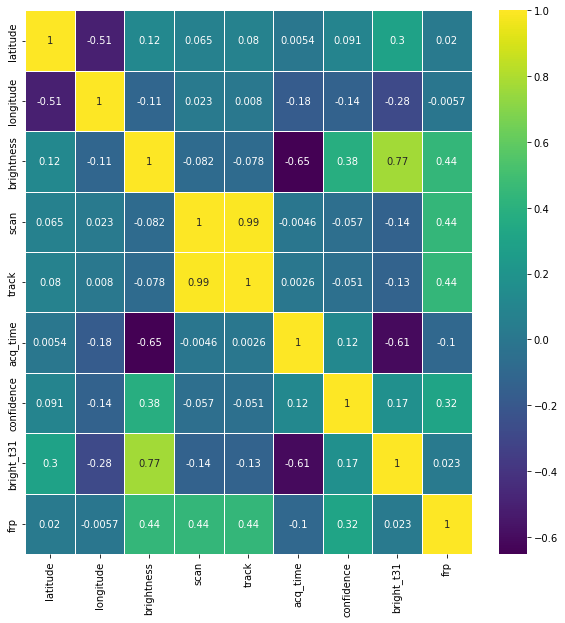

In [8]:
plt.figure(figsize=(10, 10))
sns.heatmap(wildlife.corr(),annot=True,cmap='viridis',linewidths=.5)

In [9]:
wildlife['version'].value_counts()

6.1NRT    1887
Name: version, dtype: int64

In [10]:
#As version is same for all we can drop this column
wildlife = wildlife.drop(['version'], axis = 1)

In [11]:
#From heatMap we can conclude 'track' column has an high value so we can drop this column
wildlife = wildlife.drop(['track'], axis = 1)

# Scaling down the Numeric Columns

In [12]:
wildlife.dtypes

latitude      float64
longitude     float64
brightness    float64
scan          float64
acq_date       object
acq_time        int64
satellite      object
confidence      int64
bright_t31    float64
frp           float64
daynight       object
dtype: object

In [13]:
wildlife.describe()

,latitude,longitude,brightness,scan,acq_time,confidence,bright_t31,frp
count,1887.000000,1887.000000,1887.000000,1887.000000,1887.000000,1887.000000,1887.000000,1887.000000
mean,27.431809,77.154410,328.448686,1.395140,917.121887,68.115527,307.411712,22.826010
std,5.973244,6.519533,12.280089,0.535207,477.929014,17.241913,10.210443,31.031252
min,5.581600,54.315140,300.480000,1.000000,349.000000,0.000000,272.030000,3.200000
25%,22.365765,73.935380,320.225000,1.030000,540.000000,60.000000,298.500000,10.175000
50%,30.474080,75.840480,331.350000,1.160000,758.000000,71.000000,309.540000,15.100000
75%,32.198300,79.070680,336.310000,1.560000,841.000000,79.000000,315.615000,25.905000
max,39.849320,101.964660,382.620000,4.470000,2229.000000,100.000000,329.620000,727.930000


As observed, the min_value amongst these Numeric Columns is 0, while the max_value if 2229, indicating a huge disparity amongst the Numeric features of this dataset.
To normalize that, we'll Scale down the Numeric fetaures

In [14]:
numeric_cols = ['latitude', 'longitude', 'brightness', 'scan', 'bright_t31', 'frp']

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [16]:
wildlife[numeric_cols] = scaler.fit_transform(wildlife[numeric_cols])

In [17]:
wildlife.describe()

,latitude,longitude,brightness,scan,acq_time,confidence,bright_t31,frp
count,1887.000000,1887.000000,1887.000000,1887.000000,1887.000000,1887.000000,1887.000000,1887.000000
mean,0.637632,0.479318,0.340500,0.113873,917.121887,68.115527,0.614372,0.027080
std,0.174311,0.136823,0.149502,0.154238,477.929014,17.241913,0.177295,0.042818
min,0.000000,0.000000,0.000000,0.000000,349.000000,0.000000,0.000000,0.000000
25%,0.489795,0.411762,0.240382,0.008646,540.000000,60.000000,0.459628,0.009624
50%,0.726412,0.451743,0.375822,0.046110,758.000000,71.000000,0.651328,0.016420
75%,0.776728,0.519534,0.436206,0.161383,841.000000,79.000000,0.756815,0.031329
max,1.000000,1.000000,1.000000,1.000000,2229.000000,100.000000,1.000000,1.000000


We'll be dealing with the 'acq_time' column in a different way

# Encoding Some of the Categorical Columns

In [18]:
print(wildlife['satellite'].value_counts())

A    972
T    915
Name: satellite, dtype: int64


In [19]:
wildlife['satellite']=wildlife['satellite'].map({"A":1 ,"T":0})

In [20]:
print(wildlife['daynight'].value_counts())

D    1484
N     403
Name: daynight, dtype: int64


In [21]:
wildlife['daynight'] = wildlife['daynight'].map({'D':1, 'N':0})

In [22]:
wildlife['acq_date'] = pd.to_datetime(wildlife['acq_date'])
wildlife['acq_date']

0      2022-05-11
1      2022-05-11
2      2022-05-11
3      2022-05-11
4      2022-05-11
          ...    
1882   2022-05-18
1883   2022-05-18
1884   2022-05-18
1885   2022-05-18
1886   2022-05-18
Name: acq_date, Length: 1887, dtype: datetime64[ns]

In [23]:
wildlife['year'] = wildlife['acq_date'].dt.year
wildlife['month'] = wildlife['acq_date'].dt.month
wildlife['day'] = wildlife['acq_date'].dt.day
wildlife.head

<bound method NDFrame.head of       latitude  longitude  brightness      scan   acq_date  acq_time  \
0     0.052329   0.567851    0.218042  0.002882 2022-05-11       501   
1     0.667934   0.559187    0.288167  0.132565 2022-05-11       455   
2     0.651071   0.571498    0.316898  0.095101 2022-05-11       455   
3     0.614450   0.601049    0.371682  0.028818 2022-05-11       457   
4     0.614737   0.539817    0.306915  0.167147 2022-05-11       457   
...        ...        ...         ...       ...        ...       ...   
1882  0.804123   0.433612    0.370343  0.000000 2022-05-18       818   
1883  0.804079   0.433388    0.284636  0.000000 2022-05-18       818   
1884  0.805308   0.418245    0.293280  0.000000 2022-05-18       818   
1885  0.815319   0.413071    0.251157  0.002882 2022-05-18       818   
1886  0.530973   0.673092    0.099099  0.195965 2022-05-18      1558   

      satellite  confidence  bright_t31       frp  daynight  year  month  day  
0             0          

In [24]:
bins = [0, 1, 2, 3, 4, 5]
labels = [1,2,3,4,5]
wildlife['scan_binned'] = pd.cut(wildlife['scan'], bins=bins, labels=labels)
wildlife = wildlife.drop(['scan'], axis = 1)


In [25]:
wildlife['scan_binned']


0         1
1         1
2         1
3         1
4         1
       ... 
1882    NaN
1883    NaN
1884    NaN
1885      1
1886      1
Name: scan_binned, Length: 1887, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

# Tracing the Train and Test Parameters

In [26]:
y = wildlife['confidence']
X = wildlife.drop(['confidence', 'acq_date', 'acq_time', 'bright_t31'], axis = 1)

In [27]:
X.head


<bound method NDFrame.head of       latitude  longitude  brightness  satellite       frp  daynight  year  \
0     0.052329   0.567851    0.218042          0  0.010970         1  2022   
1     0.667934   0.559187    0.288167          0  0.013384         1  2022   
2     0.651071   0.571498    0.316898          0  0.010252         1  2022   
3     0.614450   0.601049    0.371682          0  0.011177         1  2022   
4     0.614737   0.539817    0.306915          0  0.015247         1  2022   
...        ...        ...         ...        ...       ...       ...   ...   
1882  0.804123   0.433612    0.370343          1  0.017676         1  2022   
1883  0.804079   0.433388    0.284636          1  0.006471         1  2022   
1884  0.805308   0.418245    0.293280          1  0.006623         1  2022   
1885  0.815319   0.413071    0.251157          1  0.003532         1  2022   
1886  0.530973   0.673092    0.099099          0  0.009507         0  2022   

      month  day scan_binned  
0 

In [28]:
X.shape

(1887, 10)

# Splitting the dataset into train and test 

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [30]:
X_train

,latitude,longitude,brightness,satellite,frp,daynight,year,month,day,scan_binned
1649,0.545962,0.559014,0.407232,1,0.031363,1,2022,5,17,1
385,0.443757,0.649443,0.319455,0,0.009742,1,2022,5,13,1
930,0.787546,0.453412,0.123691,1,0.008431,0,2022,5,14,1
1387,0.307078,0.476920,0.415632,1,0.020573,1,2022,5,16,1
347,0.504513,0.535686,0.124178,0,0.005906,0,2022,5,12,1
...,...,...,...,...,...,...,...,...,...,...
835,0.758727,0.416001,0.418432,1,0.023402,1,2022,5,14,1
1216,0.811966,0.410104,0.300706,0,0.022257,0,2022,5,15,1
1653,0.538891,0.514767,0.404431,1,0.050212,1,2022,5,17,1
559,0.845890,0.392680,0.028610,0,0.004926,0,2022,5,13,1


In [31]:
y_train

1649     66
385      58
930      81
1387     74
347      74
       ... 
835      47
1216    100
1653     65
559      38
684      75
Name: confidence, Length: 1509, dtype: int64

In [47]:
X_train.isnull().sum()

latitude         0
longitude        0
brightness       0
satellite        0
frp              0
daynight         0
year             0
month            0
day              0
scan_binned    160
dtype: int64

In [48]:
X_train['scan_binned'].fillna(wildlife['scan_binned'].mode()[0], inplace=True)

In [49]:
X_train.isnull().sum()

latitude       0
longitude      0
brightness     0
satellite      0
frp            0
daynight       0
year           0
month          0
day            0
scan_binned    0
dtype: int64

In [50]:
#Building the Linear Regression Model 
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [51]:
from sklearn.metrics import mean_squared_error
y_pred=model.predict(X_train)
mean_squared_error(y_train,y_pred,squared=False)

12.832161648807597

In [52]:
y_train.max()

100

In [53]:
y_test

579      71
1183     58
1010    100
1330     25
77       55
       ... 
268      80
708      91
31       52
1560     42
1031     52
Name: confidence, Length: 378, dtype: int64

In [55]:
X_test['scan_binned'].fillna(wildlife['scan_binned'].mode()[0], inplace=True)

In [56]:
y_predict = model.predict(X_test) 
y_predict

array([ 67.34742718,  65.82673147, 106.35991463,  49.78478507,
        66.54558692,  46.85034425,  61.71962651,  83.29892128,
        64.10205082,  56.78665611,  51.27766312,  76.72741699,
        64.11766842,  77.25457018,  70.47286362,  57.39978445,
        69.50801702,  72.09852218,  70.25019974,  74.2533968 ,
        67.49722169,  81.02917266,  61.03596144,  65.31792204,
        57.90991002,  66.1054787 ,  69.07664071,  66.95522954,
        76.64458212,  68.83803482,  70.19362968,  55.73431371,
        79.76562981,  89.24462198,  64.99373422,  67.76959172,
        67.28631437,  64.07997727,  70.61584717,  46.92242498,
        63.59390561,  69.04177442,  62.93632897,  63.93119823,
        62.44229624,  84.24610211,  67.82538933,  56.06758343,
        72.19495986,  61.68989903,  63.88537717,  71.75911237,
        71.03355619,  79.31903409,  71.49309396,  69.02882944,
        71.97384046,  69.7028736 ,  57.40860923,  62.48211587,
        68.18308555,  71.27507304,  49.85619558,  69.18

In [57]:
mean_squared_error(y_test,y_predict,squared=False)

12.450480533122354

In [58]:
def conf(lat,long,br,sat,frp,dn,yr,mn,day,scan):
    #arr=[lat,long,br,frp,dn,scan,yr,mn,day];
    dict = {'latitude': lat, 'longitude': long,'brightness':br,'satellite':sat, 'frp': frp, 'daynight': dn, 'year': yr, 'month': mn, 'day': day,'scan_binned': scan}
    df=pd.DataFrame(dict, index=[0])
    ys=model.predict(df)
    return ys
    

In [59]:
def inp():
    lat=input();
    long=input();
    br=input();
    frp=input();
    dn=input();
    scan=input();
    yr=input();
    mn=input();
    day=input();
    sat=input();
    print(conf(lat,long,br,sat,frp,dn,yr,mn,day,scan));  

In [61]:
inp()

[36373.95952478]


In [63]:
!pip install gradio

     ---------------------------------------- 5.1/5.1 MB 14.8 MB/s eta 0:00:00
     ---------------------------------------- 57.0/57.0 KB 2.9 MB/s eta 0:00:00
     -------------------------------------- 140.6/140.6 KB 4.1 MB/s eta 0:00:00
     ---------------------------------------- 54.6/54.6 KB 2.8 MB/s eta 0:00:00
     ---------------------------------------- 1.9/1.9 MB 20.8 MB/s eta 0:00:00
     ---------------------------------------- 84.5/84.5 KB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ------------------------------------- 212.9/212.9 KB 13.5 MB/s eta 0:00:00


You should consider upgrading via the 'C:\Users\acayt\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


     ------------------------------------- 555.1/555.1 KB 17.6 MB/s eta 0:00:00
     ------------------------------------- 188.9/188.9 KB 11.2 MB/s eta 0:00:00
     -------------------------------------- 122.2/122.2 KB 3.6 MB/s eta 0:00:00
     ---------------------------------------- 63.3/63.3 KB 1.7 MB/s eta 0:00:00
     ---------------------------------------- 2.0/2.0 MB 25.0 MB/s eta 0:00:00
     ---------------------------------------- 80.6/80.6 KB 4.4 MB/s eta 0:00:00
     ---------------------------------------- 43.7/43.7 KB 1.0 MB/s eta 0:00:00
     ------------------------------------- 212.1/212.1 KB 13.5 MB/s eta 0:00:00
     ---------------------------------------- 2.4/2.4 MB 22.2 MB/s eta 0:00:00
     ---------------------------------------- 58.2/58.2 KB 1.5 MB/s eta 0:00:00
     ------------------------------------- 180.3/180.3 KB 10.6 MB/s eta 0:00:00
     -------------------------------------- 118.7/118.7 KB 6.8 MB/s eta 0:00:00
  Created wheel for ffmpy: filename=ffmpy-

In [64]:
import gradio as gr

In [67]:
interface=gr.Interface(fn=conf,
                      inputs=["text","text","text","text","text","text","text","text","text","text"],outputs=["text"])

In [68]:
interface.launch()

Running on local URL:  http://127.0.0.1:7861/

To create a public link, set `share=True` in `launch()`.


(<gradio.routes.App at 0x1b54ac81690>, 'http://127.0.0.1:7861/', None)